In [1]:
%matplotlib inline

In [2]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           1.90e-08
Time:                        12:34:35   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

# Normality of the residuals

In [3]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 3.393608024843164),
 ('Chi^2 two-tail prob.', 0.18326831231663396),
 ('Skew', -0.4865803431122335),
 ('Kurtosis', 3.003417757881633)]

In [4]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.713437811597181), ('Two-tail probability', 0.15618424580304824)]

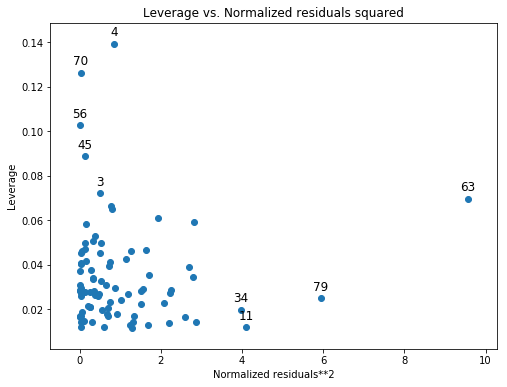

In [6]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# Heteroskedasticity

In [7]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.893213374093957),
 ('p-value', 0.08658690502352209),
 ('f-value', 2.5037159462564373),
 ('f p-value', 0.08794028782673029)]

# Linearity
Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [8]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -1.0796490077827041), ('p value', 0.28346392475394466)]

In [9]:
results.resid.sample(40).std()

21.188648916342906

In [10]:
results.resid.std()

20.155112847101957

In [11]:
results.resid.mean()

1.5929376680761316e-13

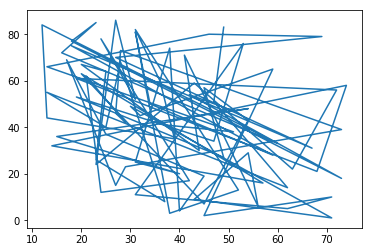

In [12]:
plt.plot(dat.Literacy,dat.Lottery)

In [13]:
dat.Literacy.mean()

39.25581395348837

In [33]:
import numpy as np
import statsmodels.formula.api as smf

def get_vif(exogs,data):
    vif_array=np.array([])
    tolerance_array=np.array([])
    
    for exog in exogs:
        not_exog=[i for i in exogs if i!=exog]
        formula=f"{exog}~{'+'.join(not_exog)}"
        
        
        r_squared=smf.ols(formula,data=data).fit().rsquared
        
        vif=1/(1-r_squared)
        vif_array=np.append(vif_array,vif).round(2)
        
        tolerance=1-r_squared
        tolerance_array=np.append(tolerance_array,tolerance).round(2)
    df_vif= pd.DataFrame({'VIF':vif_array, 'Tolerance':tolerance_array}, index=exogs)
    
    return df_vif

In [34]:
get_vif(['Literacy','np.log(Pop1831)','np.log(Wealth)'],dat)

,VIF,Tolerance
Literacy,1.11,0.90
np.log(Pop1831),1.13,0.88
np.log(Wealth),1.24,0.80


In [30]:
print('Last value for literacy',dat.Literacy.iloc[-1])
print('Mean value for literacy',dat.Literacy.mean())
lit=50
print('Last value for Pop1831',dat.Pop1831.iloc[-1])
print('mean value for Pop1831',dat.Pop1831.mean())
popu=400
X=[1,lit,popu]

results.params

print('Predicted with matrix multiplication',np.dot(X,results.params))
print('Predicted after applying the formula by hand', 246.4341-0.4889*50-31.3114*400)


Last value for literacy 49
Mean value for literacy 39.25581395348837
Last value for Pop1831 195.41
mean value for Pop1831 378.62872093023265
Predicted with matrix multiplication -12302.568914224708
Predicted after applying the formula by hand -12302.570899999999


In [31]:
[i for i in dat._get_numeric_data()]

['Unnamed: 0',
 'dept',
 'Crime_pers',
 'Crime_prop',
 'Literacy',
 'Donations',
 'Infants',
 'Suicides',
 'Wealth',
 'Commerce',
 'Clergy',
 'Crime_parents',
 'Infanticide',
 'Donation_clergy',
 'Lottery',
 'Desertion',
 'Instruction',
 'Prostitutes',
 'Distance',
 'Area',
 'Pop1831']